In [1]:
import pandas as pd
data = pd.read_pickle('join.pkl')
print(data.shape)
#data.head()

(988467, 74)


In [2]:
data = data [['ID_x','EPOPCON_ID','COMPANY_ID','DEAL_DT','CARD_NAME','PAYMENT','CO_NAME','CATE','CATE1','TAG','ADDR','LATITUDE','LONGITUDE']]
data.head()

,ID_x,EPOPCON_ID,COMPANY_ID,DEAL_DT,CARD_NAME,PAYMENT,CO_NAME,CATE,CATE1,TAG,ADDR,LATITUDE,LONGITUDE
0,97234079,cjcis15a38b36a71e42756fbe6a017,521885,2017-01-03 15:16:30,KB국민체크(6*7*),299000,세이디에스탄방점,기업,부동산,"#빌딩,#부동산",대전 서구 탄방동 745,36.34702930727666,127.38885468386889
1,97234080,cjcis15a38b36a71e42756fbe6a017,521885,2017-01-03 15:18:29,KB국민체크(6*7*),-299000,세이디에스탄방점,기업,부동산,"#빌딩,#부동산",대전 서구 탄방동 745,36.34702930727666,127.38885468386889
2,97234081,cjcis15a38b36a71e42756fbe6a017,521885,2017-01-03 15:19:36,현대카드X,200000,세이디에스탄방점,기업,부동산,"#빌딩,#부동산",대전 서구 탄방동 745,36.34702930727666,127.38885468386889
3,97234082,cjcis15a38b36a71e42756fbe6a017,521885,2017-01-03 15:19:51,KB국민체크(6*7*),99000,세이디에스탄방점,기업,부동산,"#빌딩,#부동산",대전 서구 탄방동 745,36.34702930727666,127.38885468386889
4,97234083,cjcis15a38b36a71e42756fbe6a017,521885,2017-01-03 16:25:02,KB국민체크(6*7*),39700,세이디에스탄방점,기업,부동산,"#빌딩,#부동산",대전 서구 탄방동 745,36.34702930727666,127.38885468386889


In [3]:
#스타벅스를 1517시간대에 많이 가는 사람 
data['DEAL_MINUTE'] = data['DEAL_DT'].dt.minute
data['DEAL_HOUR'] = data['DEAL_DT'].dt.hour
data['DEAL_DAY'] = data['DEAL_DT'].dt.day
data['DEAL_MONTH'] = data['DEAL_DT'].dt.month

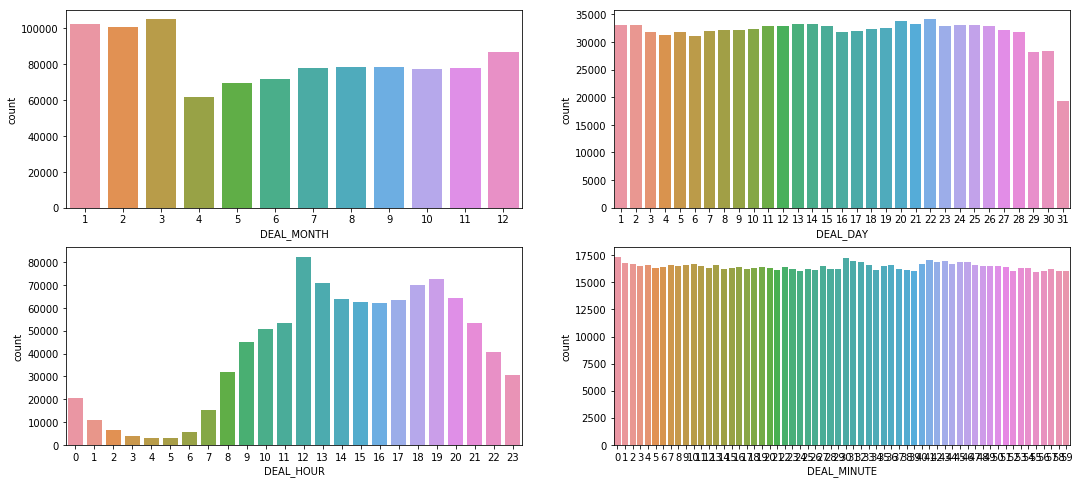

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)

figure.set_size_inches(18, 8)
sns.countplot(data=data, x="DEAL_MONTH", ax=ax1)
sns.countplot(data=data, x="DEAL_DAY", ax=ax2)
sns.countplot(data=data, x="DEAL_HOUR", ax=ax3)
sns.countplot(data=data, x="DEAL_MINUTE", ax=ax4)

In [6]:
#sns.lmplot(data=data, x="LONGITUDE", y="LATITUDE", fit_reg=False)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

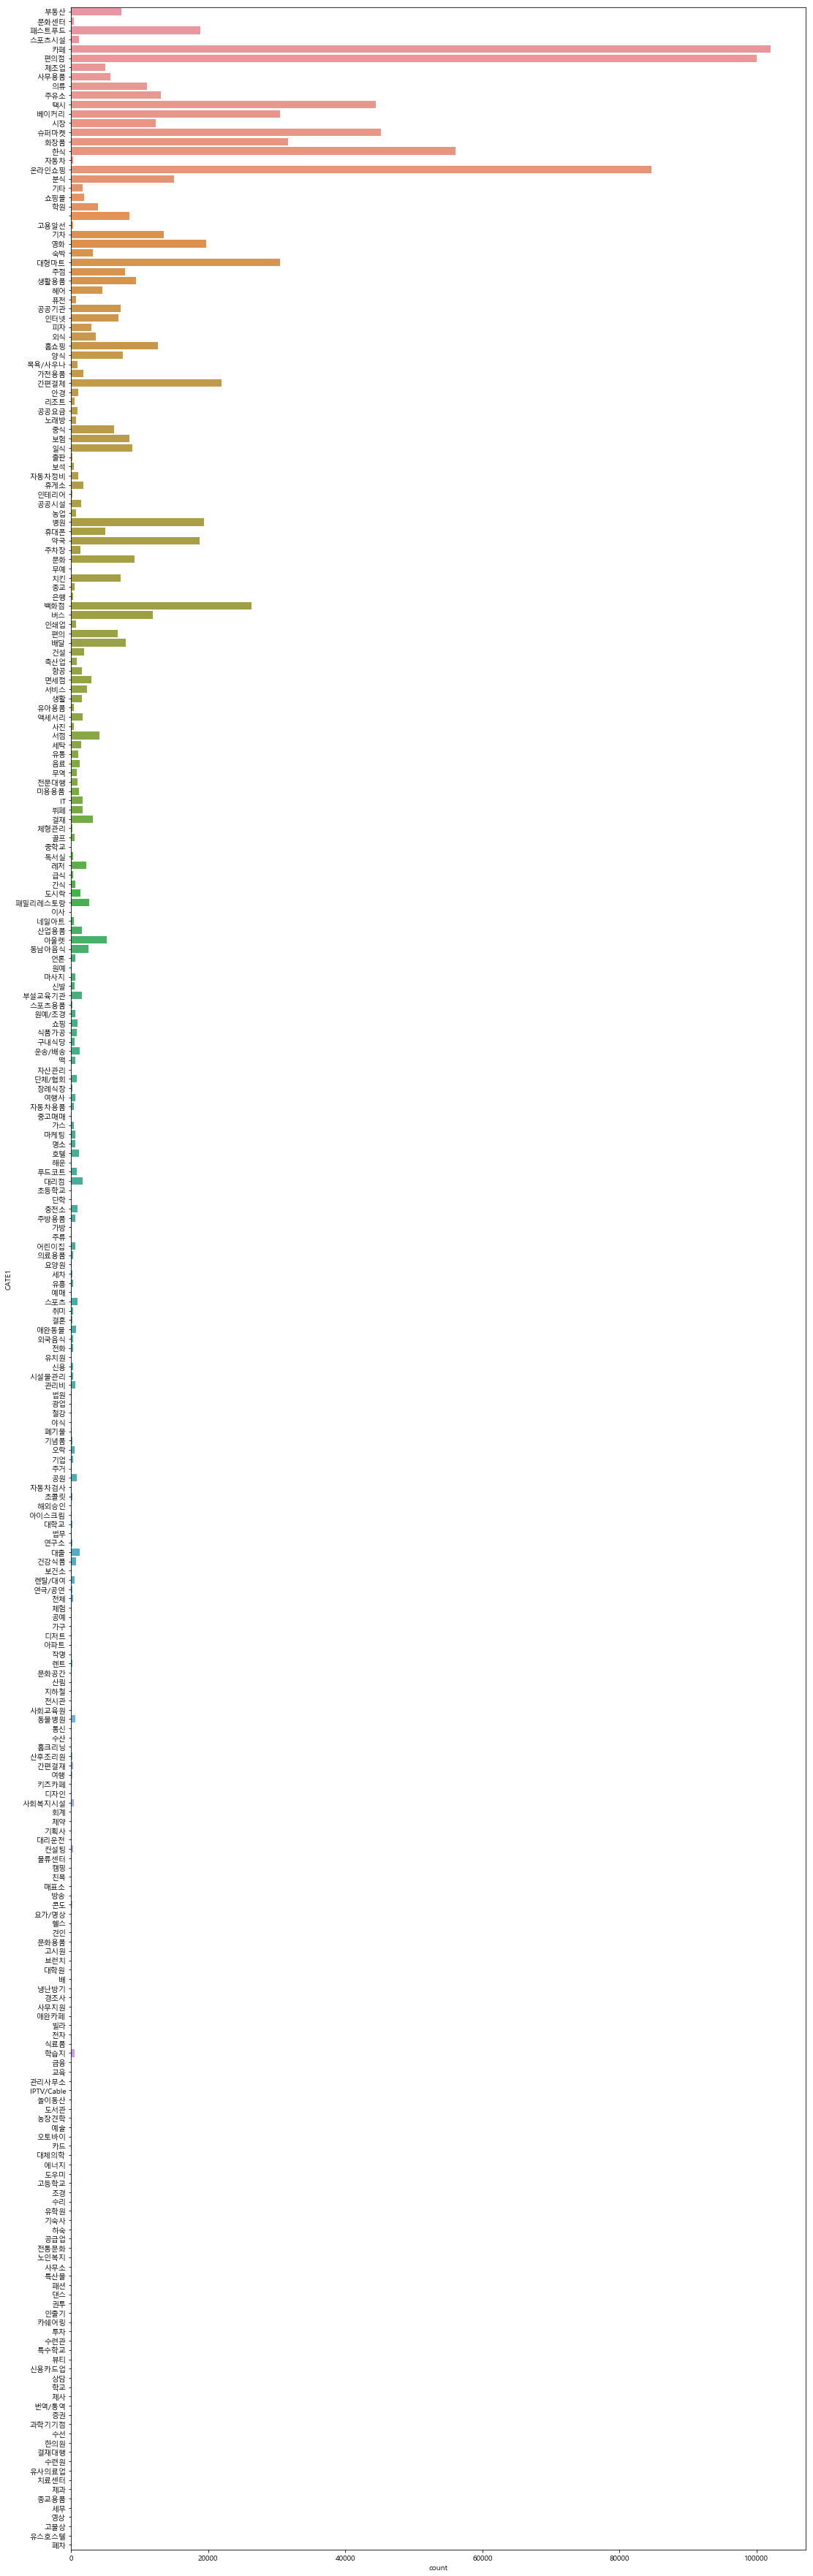

In [7]:
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 64)

sns.countplot(data=data, y="CATE1", ax=ax) #hue = 'EPOPCON_ID

#카페,편의점 > 온라인쇼핑 >> 한식 > 슈퍼마켓, 택시 > 화장품,대형마트,베이커리

In [9]:
# 유독 스타벅스 1517시간 많이가는 아이들은 최대 몇 번까지 가는지..
# starbucks id
import pymysql,pandas as pd
conn = pymysql.connect(host='192.168.0.50', port=3306, user='eums', password='eums00!q', db='eums-shared', charset='utf8')
curs = conn.cursor(pymysql.cursors.DictCursor)
curs.execute("select ID AS COMPANY_ID FROM MEUMS_COMPANY where CO_NAME regexp '스타벅스';")
comp_p = pd.DataFrame( curs.fetchall() )#[['ID','CO_NAME','CATE','CATE1','ADDR']]
conn.close()
print(comp_p.shape)
comp_p.head()


(1146, 1)


,COMPANY_ID
0,8017034
1,561760
2,5108332
3,6021337
4,7742346


In [57]:
train = pd.merge(data,comp_p, how='inner',on='COMPANY_ID')
del train['TAG']
temp = train[(train['DEAL_HOUR']>=15) & (train['DEAL_HOUR']<=17)].groupby('EPOPCON_ID').count().sort_values('ID_x',ascending=False).iloc[:,0].head(100)
train[(train['DEAL_HOUR']>=15) & (train['DEAL_HOUR']<=17)].sort_values(['EPOPCON_ID','DEAL_DT'],ascending=True).head(100)

,ID_x,EPOPCON_ID,COMPANY_ID,DEAL_DT,CARD_NAME,PAYMENT,CO_NAME,CATE,CATE1,ADDR,LATITUDE,LONGITUDE,DEAL_MINUTE,DEAL_HOUR,DEAL_DAY,DEAL_MONTH
26,97234795,cjcis15a38b36a71e42756fbe6a017,561779,2017-12-31 16:21:17,KB국민카드(8*5*),10000,스타벅스 대전중앙로역점,카페/디저트,카페,대전 중구 은행동 149,36.3279505,127.4266026,21,16,31,12
385,93249220,cjcis15a38b5676259ad0a9e317dd6,562098,2017-09-05 16:52:11,신한체크(8*2*),6300,스타벅스 한티역점,카페/디저트,카페,서울특별시 강남구 대치동 1024,37.4966731,127.055256,52,16,5,9
386,93249240,cjcis15a38b5676259ad0a9e317dd6,562098,2017-09-10 15:28:04,신한체크(8*2*),5300,스타벅스 한티역점,카페/디저트,카페,서울특별시 강남구 대치동 1024,37.4966731,127.055256,28,15,10,9
387,93249253,cjcis15a38b5676259ad0a9e317dd6,562098,2017-09-12 16:52:18,신한체크(8*2*),6300,스타벅스 한티역점,카페/디저트,카페,서울특별시 강남구 대치동 1024,37.4966731,127.055256,52,16,12,9
393,93249385,cjcis15a38b5676259ad0a9e317dd6,562098,2017-10-19 17:14:50,신한체크(8*2*),5800,스타벅스 한티역점,카페/디저트,카페,서울특별시 강남구 대치동 1024,37.4966731,127.055256,14,17,19,10
395,93249416,cjcis15a38b5676259ad0a9e317dd6,562098,2017-10-31 17:31:23,KB국민체크(1*2*),5300,스타벅스 한티역점,카페/디저트,카페,서울특별시 강남구 대치동 1024,37.4966731,127.055256,31,17,31,10
396,93249429,cjcis15a38b5676259ad0a9e317dd6,562098,2017-11-09 17:33:14,신한체크(8*2*),5300,스타벅스 한티역점,카페/디저트,카페,서울특별시 강남구 대치동 1024,37.4966731,127.055256,33,17,9,11
397,93249500,cjcis15a38b5676259ad0a9e317dd6,562098,2017-12-17 16:07:48,신한체크(8*2*),10600,스타벅스 한티역점,카페/디저트,카페,서울특별시 강남구 대치동 1024,37.4966731,127.055256,7,16,17,12
401,127460636,cjcis15a38b5676259ad0a9e317dd6,562098,2018-02-20 16:58:32,KB국민체크(1*2*),10000,스타벅스 한티역점,카페/디저트,카페,서울특별시 강남구 대치동 1024,37.4966731,127.055256,58,16,20,2
418,147829477,cjcis15a38b5795a93f40965bb731c,7288835,2017-09-19 15:07:01,하나카드(7*4*),100000,스타벅스 아산터미널점,카페/디저트,카페,충남 아산시 모종동 568-1,36.7839238,127.0163283,7,15,19,9


In [60]:
temp = pd.DataFrame(temp).reset_index()
temp['count']=temp['ID_x']
del temp['ID_x']
temp.head(20)

,level_0,index,EPOPCON_ID,count
0,0,0,cjcis15a39115cb267560d56e372ee,74
1,1,1,cjcis15a3999c5b267560d56e4ce45,48
2,2,2,cjcis15a38f181e946d9170e4afa6e,40
3,3,3,cjcis15a38c8b6e946d9170e4ac582,39
4,4,4,cjcis15a3f0f78b267561f3d753760,37
5,5,5,cjcis15a393d2c5a93f40965bca044,34
6,6,6,cjcis15a3923fde946d9170e4b81c0,34
7,7,7,cjcis15a39e9aee946d9170e4d65c4,32
8,8,8,cjcis15a38fdd071e42756fbe6fd1d,30
9,9,9,cjcis15a3af999fec3e50db1185b6e,28


In [39]:
data[data['EPOPCON_ID']=='cjcis15a39115cb267560d56e372ee'].shape # 2450,17
train = data[data['EPOPCON_ID']=='cjcis15a39115cb267560d56e372ee']
train[train['CATE1']!='택시'].shape #2407
train[train['CATE1']!='택시'].head()

,ID_x,EPOPCON_ID,COMPANY_ID,DEAL_DT,CARD_NAME,PAYMENT,CO_NAME,CATE,CATE1,TAG,ADDR,LATITUDE,LONGITUDE,DEAL_MINUTE,DEAL_HOUR,DEAL_DAY,DEAL_MONTH
44387,89703359,cjcis15a39115cb267560d56e372ee,14366,2017-01-05 07:58:47,신한카드(4*6*),11180,11번가,온라인쇼핑,온라인쇼핑,"#생활, #가정, #인터넷쇼핑몰, #통신판매",경기도 성남시 분당구 판교로 264,37.4967904,126.9194401,58,7,5,1
44388,89703384,cjcis15a39115cb267560d56e372ee,14366,2017-01-11 10:42:43,신한카드(4*6*),-9150,11번가,온라인쇼핑,온라인쇼핑,"#생활, #가정, #인터넷쇼핑몰, #통신판매",경기도 성남시 분당구 판교로 264,37.4967904,126.9194401,42,10,11,1
44389,89703386,cjcis15a39115cb267560d56e372ee,14366,2017-01-11 16:24:53,신한카드(4*6*),9150,11번가,온라인쇼핑,온라인쇼핑,"#생활, #가정, #인터넷쇼핑몰, #통신판매",경기도 성남시 분당구 판교로 264,37.4967904,126.9194401,24,16,11,1
44390,89703419,cjcis15a39115cb267560d56e372ee,14366,2017-01-21 08:49:40,신한카드(4*6*),9310,11번가,온라인쇼핑,온라인쇼핑,"#생활, #가정, #인터넷쇼핑몰, #통신판매",경기도 성남시 분당구 판교로 264,37.4967904,126.9194401,49,8,21,1
44391,89703424,cjcis15a39115cb267560d56e372ee,14366,2017-01-23 09:38:04,우리카드(9615),31260,11번가,온라인쇼핑,온라인쇼핑,"#생활, #가정, #인터넷쇼핑몰, #통신판매",경기도 성남시 분당구 판교로 264,37.4967904,126.9194401,38,9,23,1


C:\Users\epopc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\epopc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


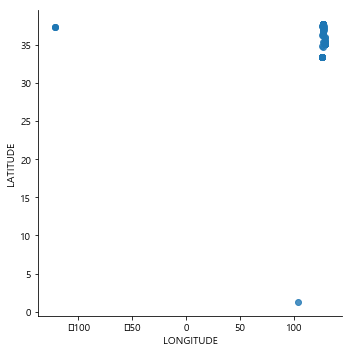

In [44]:
train['LONGITUDE'] = train['LONGITUDE'].astype(float)
train['LATITUDE'] = train['LATITUDE'].astype(float)
sns.lmplot(data=train, x="LONGITUDE", y="LATITUDE", fit_reg=False)

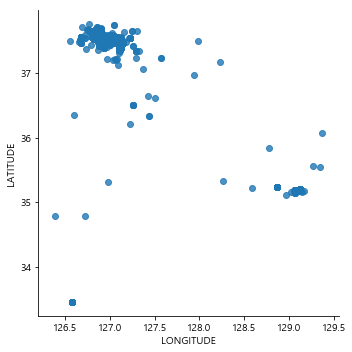

In [45]:
remove_outlier = train[(train["LONGITUDE"] > 101) & (train["LATITUDE"] >29)]
sns.lmplot(data=remove_outlier, x="LONGITUDE", y="LATITUDE", fit_reg=False)

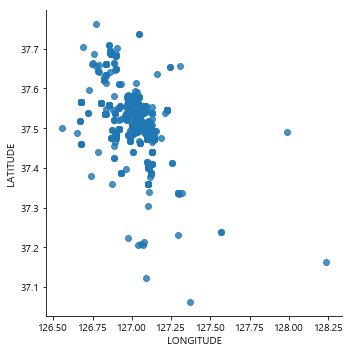

In [47]:
remove_outlier2 = train[(train["LONGITUDE"] > 101) & (train["LATITUDE"] >37)]
sns.lmplot(data=remove_outlier2, x="LONGITUDE", y="LATITUDE", fit_reg=False)

In [49]:
remove_outlier2.head(100)

,ID_x,EPOPCON_ID,COMPANY_ID,DEAL_DT,CARD_NAME,PAYMENT,CO_NAME,CATE,CATE1,TAG,ADDR,LATITUDE,LONGITUDE,DEAL_MINUTE,DEAL_HOUR,DEAL_DAY,DEAL_MONTH
3782,89703345,cjcis15a39115cb267560d56e372ee,3642111,2016-12-30 14:53:08,신한체크(6*3*),5000,택시,교통,택시,"#교통,#통신,#가상 택시회사",서울특별시 서초구 서초동 1557-7,37.491098,127.011038,53,14,30,12
3783,89703355,cjcis15a39115cb267560d56e372ee,3642111,2017-01-03 20:02:22,롯데카드(7*8*),11600,택시,교통,택시,"#교통,#통신,#가상 택시회사",서울특별시 서초구 서초동 1557-7,37.491098,127.011038,2,20,3,1
3784,89703432,cjcis15a39115cb267560d56e372ee,3642111,2017-01-25 07:37:11,롯데카드(6*0*),5000,택시,교통,택시,"#교통,#통신,#가상 택시회사",서울특별시 서초구 서초동 1557-7,37.491098,127.011038,37,7,25,1
3785,89703481,cjcis15a39115cb267560d56e372ee,3642111,2017-02-04 10:12:12,롯데카드(6*0*),7600,택시,교통,택시,"#교통,#통신,#가상 택시회사",서울특별시 서초구 서초동 1557-7,37.491098,127.011038,12,10,4,2
3786,89703483,cjcis15a39115cb267560d56e372ee,3642111,2017-02-04 10:50:54,롯데카드(6*0*),6820,택시,교통,택시,"#교통,#통신,#가상 택시회사",서울특별시 서초구 서초동 1557-7,37.491098,127.011038,50,10,4,2
3787,89703540,cjcis15a39115cb267560d56e372ee,3642111,2017-02-14 22:31:09,롯데카드(7*8*),14600,택시,교통,택시,"#교통,#통신,#가상 택시회사",서울특별시 서초구 서초동 1557-7,37.491098,127.011038,31,22,14,2
3788,89703609,cjcis15a39115cb267560d56e372ee,3642111,2017-02-28 19:11:29,롯데카드(7*8*),3000,택시,교통,택시,"#교통,#통신,#가상 택시회사",서울특별시 서초구 서초동 1557-7,37.491098,127.011038,11,19,28,2
3789,89703610,cjcis15a39115cb267560d56e372ee,3642111,2017-02-28 19:43:01,롯데카드(7*8*),3100,택시,교통,택시,"#교통,#통신,#가상 택시회사",서울특별시 서초구 서초동 1557-7,37.491098,127.011038,43,19,28,2
3790,89703611,cjcis15a39115cb267560d56e372ee,3642111,2017-02-28 23:51:00,롯데카드(6*0*),26400,택시,교통,택시,"#교통,#통신,#가상 택시회사",서울특별시 서초구 서초동 1557-7,37.491098,127.011038,51,23,28,2
3791,89703613,cjcis15a39115cb267560d56e372ee,3642111,2017-03-01 00:52:37,롯데카드(6*0*),7200,택시,교통,택시,"#교통,#통신,#가상 택시회사",서울특별시 서초구 서초동 1557-7,37.491098,127.011038,52,0,1,3


In [ ]:
data[data['EPOPCON_ID']=='cjcis15a38c8b6e946d9170e4ac582'].shape
test = data[data['EPOPCON_ID']=='cjcis15a38c8b6e946d9170e4ac582']
test.to_csv('test.csv')

In [64]:
data[data['EPOPCON_ID']=='cjcis15a38f181e946d9170e4afa6e'].shape
test = data[data['EPOPCON_ID']=='cjcis15a38f181e946d9170e4afa6e']
test.to_csv('cjcis15a38f181e946d9170e4afa6e.csv')

# plotly 

In [66]:
import plotly.plotly as py
from plotly.graph_objs import *


## sample 

In [7]:
sample = data[data['EPOPCON_ID']=='cjcis15a38b36a71e42756fbe6a017']
sample = sample[sample['PAYMENT'].astype(int)>0]
print(sample.shape)
sample.head()

(839, 13)


,ID_x,EPOPCON_ID,COMPANY_ID,DEAL_DT,CARD_NAME,PAYMENT,CO_NAME,CATE,CATE1,TAG,ADDR,LATITUDE,LONGITUDE
0,97234079,cjcis15a38b36a71e42756fbe6a017,521885,2017-01-03 15:16:30,KB국민체크(6*7*),299000,세이디에스탄방점,기업,부동산,"#빌딩,#부동산",대전 서구 탄방동 745,36.34702930727666,127.38885468386889
2,97234081,cjcis15a38b36a71e42756fbe6a017,521885,2017-01-03 15:19:36,현대카드X,200000,세이디에스탄방점,기업,부동산,"#빌딩,#부동산",대전 서구 탄방동 745,36.34702930727666,127.38885468386889
3,97234082,cjcis15a38b36a71e42756fbe6a017,521885,2017-01-03 15:19:51,KB국민체크(6*7*),99000,세이디에스탄방점,기업,부동산,"#빌딩,#부동산",대전 서구 탄방동 745,36.34702930727666,127.38885468386889
4,97234083,cjcis15a38b36a71e42756fbe6a017,521885,2017-01-03 16:25:02,KB국민체크(6*7*),39700,세이디에스탄방점,기업,부동산,"#빌딩,#부동산",대전 서구 탄방동 745,36.34702930727666,127.38885468386889
5,97234085,cjcis15a38b36a71e42756fbe6a017,521885,2017-01-03 17:04:25,KB국민체크(6*7*),9800,세이디에스탄방점,기업,부동산,"#빌딩,#부동산",대전 서구 탄방동 745,36.34702930727666,127.38885468386889


In [10]:
sample[sample['CO_NAME'].str.contains('스타벅스')].shape

(40, 13)

In [13]:
sample[sample['CO_NAME'].str.contains('스타벅스')].sort_values('DEAL_DT').head(40)

,ID_x,EPOPCON_ID,COMPANY_ID,DEAL_DT,CARD_NAME,PAYMENT,CO_NAME,CATE,CATE1,TAG,ADDR,LATITUDE,LONGITUDE
42073,97234102,cjcis15a38b36a71e42756fbe6a017,561779,2017-01-08 22:43:56,삼성카드(9678),8200,스타벅스 대전중앙로역점,카페/디저트,카페,"#음식점, #카페, #스타벅스, #커피전문점",대전 중구 은행동 149,36.3279505,127.4266026
42074,97234148,cjcis15a38b36a71e42756fbe6a017,561779,2017-01-31 10:33:52,KB국민체크(6*7*),9200,스타벅스 대전중앙로역점,카페/디저트,카페,"#음식점, #카페, #스타벅스, #커피전문점",대전 중구 은행동 149,36.3279505,127.4266026
74967,97234223,cjcis15a38b36a71e42756fbe6a017,5928847,2017-03-16 12:48:48,삼성카드(9678),10200,스타벅스 대전세이1층점,카페/디저트,카페,"#음식점, #카페, #스타벅스, #커피전문점",대전 중구 문화동 1-16 백화점세이 세이투 1층,36.3210115,127.4089626
74968,97234431,cjcis15a38b36a71e42756fbe6a017,5928847,2017-06-03 08:44:47,삼성카드(9678),10200,스타벅스 대전세이1층점,카페/디저트,카페,"#음식점, #카페, #스타벅스, #커피전문점",대전 중구 문화동 1-16 백화점세이 세이투 1층,36.3210115,127.4089626
74969,97234489,cjcis15a38b36a71e42756fbe6a017,5928847,2017-06-28 09:13:02,롯데카드(2*2*),5100,스타벅스 대전세이1층점,카페/디저트,카페,"#음식점, #카페, #스타벅스, #커피전문점",대전 중구 문화동 1-16 백화점세이 세이투 1층,36.3210115,127.4089626
42075,97234523,cjcis15a38b36a71e42756fbe6a017,561779,2017-09-19 10:40:30,현대카드X,2000,스타벅스 대전중앙로역점,카페/디저트,카페,"#음식점, #카페, #스타벅스, #커피전문점",대전 중구 은행동 149,36.3279505,127.4266026
42077,97234525,cjcis15a38b36a71e42756fbe6a017,561779,2017-09-19 10:41:45,현대카드X,2200,스타벅스 대전중앙로역점,카페/디저트,카페,"#음식점, #카페, #스타벅스, #커피전문점",대전 중구 은행동 149,36.3279505,127.4266026
42078,97234528,cjcis15a38b36a71e42756fbe6a017,561779,2017-09-20 08:57:38,KB국민카드(8*5*),4600,스타벅스 대전중앙로역점,카페/디저트,카페,"#음식점, #카페, #스타벅스, #커피전문점",대전 중구 은행동 149,36.3279505,127.4266026
42079,97234544,cjcis15a38b36a71e42756fbe6a017,561779,2017-09-25 08:47:16,KB국민카드(8*5*),5100,스타벅스 대전중앙로역점,카페/디저트,카페,"#음식점, #카페, #스타벅스, #커피전문점",대전 중구 은행동 149,36.3279505,127.4266026
42080,97234552,cjcis15a38b36a71e42756fbe6a017,561779,2017-09-27 08:59:02,KB국민체크(6*7*),5100,스타벅스 대전중앙로역점,카페/디저트,카페,"#음식점, #카페, #스타벅스, #커피전문점",대전 중구 은행동 149,36.3279505,127.4266026
